In [1]:
from src.libs.models.simple_bot import MLChitChat
import pandas as pd

In [2]:
train_li = []
with open('data/dialogues.txt') as f:
    tmp_str = ''
    for line in f.readlines():
        if line == '\n':
            train_li.append(tmp_str)
            tmp_str = ''
        else:
            tmp_str += line.strip('-').strip() + '<eom>'

In [3]:
train = pd.DataFrame()
train['dialogue'] = train_li
del train_li
train

,dialogue
0,"Пока, толстуха!<eom>Пока, малышка!<eom>"
1,"Этому надо положить конец,<eom>Это не жизнь!<eom>"
2,"А ты не помолчишь?<eom>Замолчу, когда захочу.<..."
3,"А ты не помолчишь?<eom>Замолчу, когда захочу.<..."
4,"Это зависит!<eom>Будет сегодня хорошая погода,..."
...,...
1034001,"Вот. Выпей. Тебе станет легче. Нет, нет, пока ..."
1034002,"Но почему ты спрашиваешь меня? Я думала, что....."
1034003,Никак потерял что?<eom>Да вот сокровище пропал...
1034004,"Ты что же, собирался убить ее?<eom>Разумеется...."


In [33]:
chats = pd.read_csv('data/dialogues.tsv', sep='\t')
chats.loc[0, 'dialogue']

'<span class=participant_2>Пользователь 2: Привет) расскажи о себе</span><br /><span class=participant_1>Пользователь 1: Привет) под вкусный кофеек настроение поболтать появилось<br />)</span><br /><span class=participant_2>Пользователь 2: Что читаешь? Мне нравится классика</span><br /><span class=participant_2>Пользователь 2: Я тоже люблю пообщаться</span><br /><span class=participant_1>Пользователь 1: Люблю животных, просто обожаю, как и свою работу)</span><br /><span class=participant_1>Пользователь 1: Я фантастику люблю</span><br /><span class=participant_2>Пользователь 2: А я выращиваю фиалки</span><br /><span class=participant_2>Пользователь 2: И веду здоровый и активный образ жизни!</span><br /><span class=participant_1>Пользователь 1: Ух ты, интересно.</span><br /><span class=participant_2>Пользователь 2: Ты случайно не принц на белом коне? Я его очень жду<br />..</span><br /><span class=participant_1>Пользователь 1: А у меня из хобби каждую неделю тусить с моим лучшим<br />дру

In [5]:
def clear_char(text):
    text = text.split('</span><br />')
    prev_class = 0
    cur_class = 0
    new_dial = []
    for t in text[:-1]:
        t = t.replace('<br />', ' ')
        if t.find('participant_1') > -1:
            cur_class = 1
        else:
            cur_class = 2
        t = t.replace('<span class=participant_1>', '').replace('<span class=participant_2>', '').replace('Пользователь 2: ', '').replace('Пользователь 1: ', '')
        if cur_class == prev_class:
            new_dial[-1] += '\n' + t
            prev_class = cur_class
        else:
            new_dial.append(t)
            prev_class = cur_class

    return '<eom>'.join(s for s in new_dial)

In [6]:
test = '<span class=participant_2>Пользователь 2: Привет) расскажи о себе</span><br /><span class=participant_1>Пользователь 1: Привет) под вкусный кофеек настроение поболтать появилось<br />)</span><br /><span class=participant_2>Пользователь 2: Что читаешь? Мне нравится классика</span><br /><span class=participant_2>Пользователь 2: Я тоже люблю пообщаться</span><br /><span class=participant_1>Пользователь 1: Люблю животных, просто обожаю, как и свою работу)</span><br /><span class=participant_1>Пользователь 1: Я фантастику люблю</span><br /><span class=participant_2>Пользователь 2: А я выращиваю фиалки</span><br /><span class=participant_2>Пользователь 2: И веду здоровый и активный образ жизни!</span><br /><span class=participant_1>Пользователь 1: Ух ты, интересно.</span><br /><span class=participant_2>Пользователь 2: Ты случайно не принц на белом коне? Я его очень жду<br />..</span><br /><span class=participant_1>Пользователь 1: А у меня из хобби каждую неделю тусить с моим лучшим<br />другом)</span><br />'
clear_char(test)

'Привет) расскажи о себе<eom>Привет) под вкусный кофеек настроение поболтать появилось )<eom>Что читаешь? Мне нравится классика\nЯ тоже люблю пообщаться<eom>Люблю животных, просто обожаю, как и свою работу)\nЯ фантастику люблю<eom>А я выращиваю фиалки\nИ веду здоровый и активный образ жизни!<eom>Ух ты, интересно.<eom>Ты случайно не принц на белом коне? Я его очень жду ..<eom>А у меня из хобби каждую неделю тусить с моим лучшим другом)'

In [34]:
chats['dialogue'] = chats['dialogue'].apply(clear_char)
chats.loc[0, 'dialogue']

'Привет) расскажи о себе<eom>Привет) под вкусный кофеек настроение поболтать появилось )<eom>Что читаешь? Мне нравится классика\nЯ тоже люблю пообщаться<eom>Люблю животных, просто обожаю, как и свою работу)\nЯ фантастику люблю<eom>А я выращиваю фиалки\nИ веду здоровый и активный образ жизни!<eom>Ух ты, интересно.<eom>Ты случайно не принц на белом коне? Я его очень жду ..<eom>А у меня из хобби каждую неделю тусить с моим лучшим другом)'

In [8]:
chats['length'] = chats['dialogue'].apply(lambda x: len(x.split('<eom>')))
train['length'] = train['dialogue'].apply(lambda x: len(x.split('<eom>')))

<AxesSubplot:>

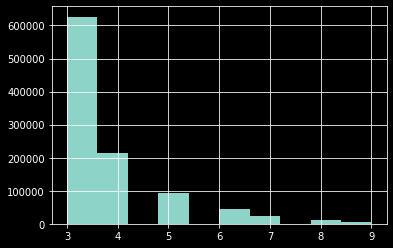

In [9]:
train.loc[(train.length < 10) & (train.length > 2), 'length'].hist()

<AxesSubplot:>

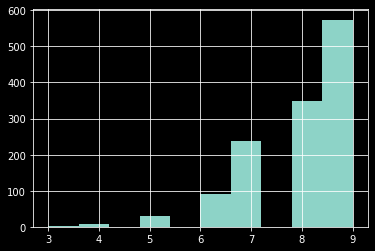

In [10]:
chats.loc[(chats.length < 10) & (chats.length > 2), 'length'].hist()

In [11]:
print(train[(train.length < 7) & (train.length > 2)].shape[0])
print(chats[(chats.length < 10) & (chats.length > 2)].shape[0])

980564
1290


In [12]:
chats_li = chats['dialogue'].apply(lambda x: '<eom>'.join(s for s in x.split('<eom>')[:3]) + '<eom>').to_list()
print(len(chats_li))
chats_li.extend(chats['dialogue'].apply(lambda x: '<eom>'.join(s for s in x.split('<eom>')[3:6]) + '<eom>').to_list())
print(len(chats_li))
chats_li.extend(chats['dialogue'].apply(lambda x: '<eom>'.join(s for s in x.split('<eom>')[6:9]) + '<eom>').to_list())
print(len(chats_li))
chats_li.extend(chats['dialogue'].apply(lambda x: '<eom>'.join(s for s in x.split('<eom>')[9:12]) + '<eom>').to_list())
print(len(chats_li))

10013
20026
30039
40052


In [13]:
chats_li.extend(train.loc[train.length > 6, 'dialogue'].apply(lambda x: '<eom>'.join(s for s in x.split('<eom>')[:3]) + '<eom>').to_list())
print(len(chats_li))
chats_li.extend(train.loc[train.length > 6, 'dialogue'].apply(lambda x: '<eom>'.join(s for s in x.split('<eom>')[3:6]) + '<eom>').to_list())
print(len(chats_li))

93494
146936


In [14]:
print(chats_li[10013])
print(chats_li[-1])

Люблю животных, просто обожаю, как и свою работу)
Я фантастику люблю<eom>А я выращиваю фиалки
И веду здоровый и активный образ жизни!<eom>Ух ты, интересно.<eom>
Чего так дешево - украл, что ли?<eom>А ты прокурор?<eom>Сколько у тебя в сумке?<eom>


144687
2


<AxesSubplot:>

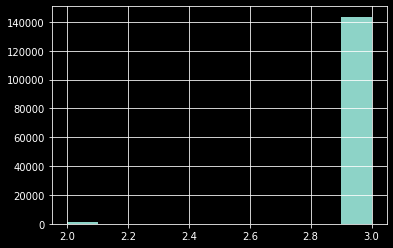

In [15]:
chats = pd.DataFrame()
chats['dialogue'] = chats_li
chats['length'] = chats['dialogue'].apply(lambda x: len(x.split('<eom>')[:-1]))
chats = chats[chats.length > 1]
print(chats.shape[0])
print(chats.length.min())
chats['length'].hist()

In [16]:
train_df = train[(train.length < 7) & (train.length > 2)].sample(820000)
val_df = train[(train.length < 7) & (train.length > 2) & (~train.index.isin(train_df.index))]
train_df = train_df.reset_index(drop=True)
val_df = val_df.reset_index(drop=True)

In [17]:
train_df = chats.sample(int(0.9*chats.shape[0]))
val_df = chats[(~chats.index.isin(train_df.index))]
train_df = train_df.reset_index(drop=True)
val_df = val_df.reset_index(drop=True)

In [18]:
print(train_df.shape[0])
print(val_df.shape[0])

130218
14469


In [19]:
train_df.loc[0, 'dialogue'].split('<eom>')[-2]

'Только что убили хозяина. Здесь в баре.'

In [20]:
train_df['question'] = train_df['dialogue'].apply(lambda x: "<eom>".join(s for s in x.split('<eom>')[:-2]))
train_df['answer'] = train_df['dialogue'].apply(lambda x: x.split('<eom>')[-2])
val_df['question'] = val_df['dialogue'].apply(lambda x: "<eom>".join(s for s in x.split('<eom>')[:-2]))
val_df['answer'] = val_df['dialogue'].apply(lambda x: x.split('<eom>')[-2])

In [21]:
val_df

,dialogue,length,question,answer
0,Здравствуйте\nЯ Леша<eom>Здравствуйте\nЯ Егор<...,3,Здравствуйте\nЯ Леша<eom>Здравствуйте\nЯ Егор,Я учусь в 6 классе
1,"Привет<eom>Привет<eom>Как дела? Я и Норвегии,а...",3,Привет<eom>Привет,"Как дела? Я и Норвегии,а ты?"
2,Привет. Как дела?<eom>Привет. У меня неочень. ...,3,Привет. Как дела?<eom>Привет. У меня неочень. ...,Чем любишь заниматься? Я художник. Очень люблю...
3,Привет<eom>Давай знакомится?<eom>Давай<eom>,3,Привет<eom>Давай знакомится?,Давай
4,привет<eom>Приветик\nКак дела?<eom>надеюсь не ...,3,привет<eom>Приветик\nКак дела?,надеюсь не глупый у меня собеседник ?))))) отл...
...,...,...,...,...
14464,"И молодая.<eom>Правда?.. Я тебе верю. Верю, но...",3,"И молодая.<eom>Правда?.. Я тебе верю. Верю, но...",Боишься? Но чего?
14465,Домой. Сейчас парни придут. А велик у тебя отк...,3,Домой. Сейчас парни придут. А велик у тебя отк...,На кой он мне? У меня же есть.
14466,Нет. Мне девятнадцать.<eom>Скоро суд?<eom>Скор...,3,Нет. Мне девятнадцать.<eom>Скоро суд?,Скоро.
14467,"Ну, говори.<eom>Дай закурить?<eom>Я не курю.<eom>",3,"Ну, говори.<eom>Дай закурить?",Я не курю.


In [22]:
model = MLChitChat()
# additional_special_tokens = model.tokenizer.special_tokens_map['additional_special_tokens']
model.tokenizer

PreTrainedTokenizer(name_or_path='cointegrated/rut5-small-chitchat', vocab_size=20200, model_max_len=1000000000000000019884624838656, is_fast=False, padding_side='right', truncation_side='right', special_tokens={'eos_token': '</s>', 'unk_token': '<unk>', 'pad_token': '<pad>', 'additional_special_tokens': ['<extra_id_0>', '<extra_id_1>', '<extra_id_2>', '<extra_id_3>', '<extra_id_4>', '<extra_id_5>', '<extra_id_6>', '<extra_id_7>', '<extra_id_8>', '<extra_id_9>', '<extra_id_10>', '<extra_id_11>', '<extra_id_12>', '<extra_id_13>', '<extra_id_14>', '<extra_id_15>', '<extra_id_16>', '<extra_id_17>', '<extra_id_18>', '<extra_id_19>', '<extra_id_20>', '<extra_id_21>', '<extra_id_22>', '<extra_id_23>', '<extra_id_24>', '<extra_id_25>', '<extra_id_26>', '<extra_id_27>', '<extra_id_28>', '<extra_id_29>', '<extra_id_30>', '<extra_id_31>', '<extra_id_32>', '<extra_id_33>', '<extra_id_34>', '<extra_id_35>', '<extra_id_36>', '<extra_id_37>', '<extra_id_38>', '<extra_id_39>', '<extra_id_40>', '<extr

In [23]:
print(model.tokenizer.vocab_size)
print(model.tokenizer.encode("<extra_id_0>"))
print(model.tokenizer.encode("<extra_id_99>"))
print(model.tokenizer.encode("<eom>"))
model.tokenizer.add_special_tokens({'sep_token': "<eom>"})
# model.tokenizer.additional_special_tokens = additional_special_tokens
print(model.tokenizer.vocab_size)
print(model.tokenizer.encode("<extra_id_0>"))
print(model.tokenizer.encode("<extra_id_99>"))
print(model.tokenizer.encode("<eom>"))
model.tokenizer.convert_ids_to_tokens(20200)

20200
[20199, 1]
[20100, 1]
[1042, 265, 773, 669, 1]
20200
[20199, 1]
[20100, 1]
[20200, 1]


'<eom>'

In [24]:
len(model.tokenizer.get_vocab())

20201

In [25]:
model.generator.resize_token_embeddings(len(model.tokenizer.get_vocab()))

Embedding(20201, 512)

In [26]:
model.generator

T5ForConditionalGeneration(
  (shared): Embedding(20201, 512)
  (encoder): T5Stack(
    (embed_tokens): Embedding(20201, 512)
    (block): ModuleList(
      (0): T5Block(
        (layer): ModuleList(
          (0): T5LayerSelfAttention(
            (SelfAttention): T5Attention(
              (q): Linear(in_features=512, out_features=384, bias=False)
              (k): Linear(in_features=512, out_features=384, bias=False)
              (v): Linear(in_features=512, out_features=384, bias=False)
              (o): Linear(in_features=384, out_features=512, bias=False)
              (relative_attention_bias): Embedding(32, 6)
            )
            (layer_norm): T5LayerNorm()
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (1): T5LayerFF(
            (DenseReluDense): T5DenseGatedGeluDense(
              (wi_0): Linear(in_features=512, out_features=1024, bias=False)
              (wi_1): Linear(in_features=512, out_features=1024, bias=False)
              (wo):

In [26]:
print(clear_char(test))
model(clear_char(test))

Привет) расскажи о себе<eom>Привет) под вкусный кофеек настроение поболтать появилось )<eom>Что читаешь? Мне нравится классика
Я тоже люблю пообщаться<eom>Люблю животных, просто обожаю, как и свою работу)
Я фантастику люблю<eom>А я выращиваю фиалки
И веду здоровый и активный образ жизни!<eom>Ух ты, интересно.<eom>Ты случайно не принц на белом коне? Я его очень жду ..<eom>А у меня из хобби каждую неделю тусить с моим лучшим другом)


[('Мне тоже нравится, я надеюсь, что он выращивает большие фиалки.',
  -0.5089200735092163),
 ('я тоже люблю, но я думаю, что это очень хорошая работа. Я надеюсь, что все получится весело!',
  -0.38615018129348755),
 ('Это здорово! У меня всё получится!!!', -0.9721251130104065)]

In [23]:
pairs = train_df[['question', 'answer']].values
print(pairs[0, :])
val_pairs = val_df[['question', 'answer']].values
print(val_pairs[0, :])

['За наши города!<eom>За наших женщин! За наших детей!'
 'Княже! - кричал кто-то то сбоку, то сзади.']
['Здравствуйте\nЯ Леша<eom>Здравствуйте\nЯ Егор' 'Я учусь в 6 классе']


In [30]:
import torch
model.generator.cuda()
optimizer = torch.optim.Adam(model.generator.parameters(), lr=1e-5)

In [30]:
torch.cuda.empty_cache()

In [31]:
from tqdm.auto import trange
import random
import numpy as np

batch_size = 2  # сколько примеров показываем модели за один шаг
report_steps = 1000  # раз в сколько шагов печатаем результат
epochs = 3  # сколько раз мы покажем данные модели

model.generator.train()
losses = []
epoch_losses = []
for epoch in range(epochs):
    print('EPOCH', epoch)
    random.shuffle(pairs)
    for i in trange(0, int(len(pairs) / batch_size)):
        batch = pairs[i * batch_size: (i + 1) * batch_size]
        # кодируем вопрос и ответ 
        x = model.tokenizer([p[0] for p in batch], return_tensors='pt', padding=True).to(model.generator.device)
        y = model.tokenizer([p[1] for p in batch], return_tensors='pt', padding=True).to(model.generator.device)
        # -100 - специальное значение, позволяющее не учитывать токены
        y.input_ids[y.input_ids == 0] = -100
        # вычисляем функцию потерь
        loss = model.generator(
            input_ids=x.input_ids,
            attention_mask=x.attention_mask,
            labels=y.input_ids,
            decoder_attention_mask=y.attention_mask,
            return_dict=True
        ).loss
        # делаем шаг градиентного спуска
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        # печатаем скользящее среднее значение функции потерь
        losses.append(loss.item())
        if i % report_steps == 0:
            print('step', i, 'loss', np.mean(losses[-report_steps:]))
    val_losses = []
    with torch.no_grad():
        for i in trange(0, int(len(val_pairs) / batch_size)):
            batch = pairs[i * batch_size: (i + 1) * batch_size]
            # кодируем вопрос и ответ 
            x = model.tokenizer([p[0] for p in batch], return_tensors='pt', padding=True).to(model.generator.device)
            y = model.tokenizer([p[1] for p in batch], return_tensors='pt', padding=True).to(model.generator.device)
            # -100 - специальное значение, позволяющее не учитывать токены
            y.input_ids[y.input_ids == 0] = -100
            # вычисляем функцию потерь
            loss = model.generator(
                input_ids=x.input_ids,
                attention_mask=x.attention_mask,
                labels=y.input_ids,
                decoder_attention_mask=y.attention_mask,
                return_dict=True
            ).loss
            # печатаем скользящее среднее значение функции потерь
            val_losses.append(loss.item())
    
    val_losses = np.mean(val_losses)
    print('epoch', epoch, 'val loss', val_losses)
    epoch_losses.append(val_losses)

print(epoch_losses)

EPOCH 0


  0%|          | 2/65109 [00:00<2:03:18,  8.80it/s]

step 0 loss 3.115985631942749


  2%|▏         | 1002/65109 [01:44<1:50:32,  9.67it/s]

step 1000 loss 3.4471980141401293


  3%|▎         | 2002/65109 [03:29<1:56:38,  9.02it/s]

step 2000 loss 3.3300618364810943


  5%|▍         | 3002/65109 [05:13<1:47:01,  9.67it/s]

step 3000 loss 3.367481422960758


  6%|▌         | 4002/65109 [06:57<1:43:30,  9.84it/s]

step 4000 loss 3.3565290806889534


  8%|▊         | 5002/65109 [08:39<1:40:46,  9.94it/s]

step 5000 loss 3.312300791025162


  9%|▉         | 6002/65109 [10:22<1:40:58,  9.76it/s]

step 6000 loss 3.314377509593964


 11%|█         | 7002/65109 [12:05<1:39:30,  9.73it/s]

step 7000 loss 3.2687575657367707


 12%|█▏        | 8002/65109 [13:48<1:37:39,  9.75it/s]

step 8000 loss 3.3104700867533685


 14%|█▍        | 9002/65109 [15:30<1:36:19,  9.71it/s]

step 9000 loss 3.2798306809067728


 15%|█▌        | 10002/65109 [17:13<1:33:41,  9.80it/s]

step 10000 loss 3.2702322623729705


 17%|█▋        | 11002/65109 [18:56<1:33:02,  9.69it/s]

step 11000 loss 3.302186272919178


 18%|█▊        | 12002/65109 [20:39<1:32:34,  9.56it/s]

step 12000 loss 3.2284191232323645


 20%|█▉        | 13002/65109 [22:21<1:28:43,  9.79it/s]

step 13000 loss 3.2782638363838195


 22%|██▏       | 14002/65109 [24:04<1:26:22,  9.86it/s]

step 14000 loss 3.2022857100963593


 23%|██▎       | 15002/65109 [25:45<1:25:20,  9.79it/s]

step 15000 loss 3.25102147680521


 25%|██▍       | 16002/65109 [27:28<1:24:21,  9.70it/s]

step 16000 loss 3.2281905057430267


 26%|██▌       | 17003/65109 [29:11<1:22:16,  9.74it/s]

step 17000 loss 3.2553275725245476


 28%|██▊       | 18002/65109 [30:54<1:21:53,  9.59it/s]

step 18000 loss 3.2159819596111774


 29%|██▉       | 19003/65109 [32:37<1:16:09, 10.09it/s]

step 19000 loss 3.1954768838882446


 31%|███       | 20002/65109 [34:20<1:17:27,  9.71it/s]

step 20000 loss 3.201230773746967


 32%|███▏      | 21002/65109 [36:02<1:15:05,  9.79it/s]

step 21000 loss 3.2063955262899397


 34%|███▍      | 22002/65109 [37:45<1:15:21,  9.53it/s]

step 22000 loss 3.187382999539375


 35%|███▌      | 23002/65109 [39:27<1:11:55,  9.76it/s]

step 23000 loss 3.207258241891861


 37%|███▋      | 24002/65109 [41:10<1:10:43,  9.69it/s]

step 24000 loss 3.2361978863477705


 38%|███▊      | 25002/65109 [42:52<1:08:41,  9.73it/s]

step 25000 loss 3.228820106983185


 40%|███▉      | 26002/65109 [44:37<1:08:16,  9.55it/s]

step 26000 loss 3.199788388252258


 41%|████▏     | 27002/65109 [46:22<1:06:26,  9.56it/s]

step 27000 loss 3.2197263151407243


 43%|████▎     | 28002/65109 [48:07<1:05:02,  9.51it/s]

step 28000 loss 3.2296208064556122


 45%|████▍     | 29002/65109 [49:51<1:03:17,  9.51it/s]

step 29000 loss 3.169963461458683


 46%|████▌     | 30002/65109 [51:36<59:09,  9.89it/s]  

step 30000 loss 3.221647854745388


 48%|████▊     | 31002/65109 [53:20<1:00:10,  9.45it/s]

step 31000 loss 3.1876428775191306


 49%|████▉     | 32002/65109 [55:03<56:13,  9.81it/s]  

step 32000 loss 3.2241081143915653


 51%|█████     | 33002/65109 [56:47<55:16,  9.68it/s]  

step 33000 loss 3.171362874507904


 52%|█████▏    | 34002/65109 [58:32<54:15,  9.56it/s]  

step 34000 loss 3.163117436826229


 54%|█████▍    | 35002/65109 [1:00:17<52:19,  9.59it/s]

step 35000 loss 3.2279421983957293


 55%|█████▌    | 36002/65109 [1:02:02<50:48,  9.55it/s]  

step 36000 loss 3.189330155789852


 57%|█████▋    | 37002/65109 [1:03:48<48:58,  9.57it/s]  

step 37000 loss 3.1877514412403105


 58%|█████▊    | 38002/65109 [1:05:32<46:55,  9.63it/s]

step 38000 loss 3.153031407058239


 60%|█████▉    | 39002/65109 [1:07:16<45:49,  9.49it/s]  

step 39000 loss 3.1825489787459373


 61%|██████▏   | 40002/65109 [1:09:00<43:06,  9.71it/s]

step 40000 loss 3.148696177959442


 63%|██████▎   | 41002/65109 [1:10:45<42:41,  9.41it/s]

step 41000 loss 3.1501326568722723


 65%|██████▍   | 42002/65109 [1:12:29<40:31,  9.50it/s]

step 42000 loss 3.1884008872509004


 66%|██████▌   | 43002/65109 [1:14:15<38:09,  9.65it/s]

step 43000 loss 3.1432268384695052


 68%|██████▊   | 44002/65109 [1:16:00<36:34,  9.62it/s]

step 44000 loss 3.170170340538025


 69%|██████▉   | 45002/65109 [1:17:45<34:17,  9.77it/s]

step 45000 loss 3.203141771018505


 71%|███████   | 46002/65109 [1:19:29<32:30,  9.79it/s]

step 46000 loss 3.1835180445313456


 72%|███████▏  | 47002/65109 [1:21:14<31:00,  9.73it/s]

step 47000 loss 3.133787579059601


 74%|███████▎  | 48002/65109 [1:22:58<29:43,  9.59it/s]

step 48000 loss 3.1736172177791597


 75%|███████▌  | 49002/65109 [1:24:42<29:02,  9.24it/s]

step 49000 loss 3.148015084862709


 77%|███████▋  | 50002/65109 [1:26:27<26:29,  9.51it/s]

step 50000 loss 3.1614753194451333


 78%|███████▊  | 51002/65109 [1:28:12<24:35,  9.56it/s]

step 51000 loss 3.12683158403635


 80%|███████▉  | 52002/65109 [1:29:57<22:24,  9.75it/s]

step 52000 loss 3.1735910010933877


 81%|████████▏ | 53002/65109 [1:31:42<20:52,  9.67it/s]

step 53000 loss 3.197618998557329


 83%|████████▎ | 54002/65109 [1:33:28<19:17,  9.60it/s]

step 54000 loss 3.1409060355424883


 84%|████████▍ | 55002/65109 [1:35:13<17:37,  9.56it/s]

step 55000 loss 3.156679032146931


 86%|████████▌ | 56002/65109 [1:36:57<15:39,  9.70it/s]

step 56000 loss 3.1261500188708307


 88%|████████▊ | 57002/65109 [1:38:42<14:08,  9.56it/s]

step 57000 loss 3.177689130485058


 89%|████████▉ | 58002/65109 [1:40:27<12:38,  9.37it/s]

step 58000 loss 3.0638647976815703


 91%|█████████ | 59002/65109 [1:42:12<10:40,  9.54it/s]

step 59000 loss 3.1698557267189025


 92%|█████████▏| 60002/65109 [1:43:58<09:28,  8.99it/s]

step 60000 loss 3.172553011536598


 94%|█████████▎| 61002/65109 [1:45:43<07:11,  9.52it/s]

step 61000 loss 3.1396613978743555


 95%|█████████▌| 62002/65109 [1:47:29<05:39,  9.16it/s]

step 62000 loss 3.1691228169202805


 97%|█████████▋| 63002/65109 [1:49:14<03:37,  9.67it/s]

step 63000 loss 3.147324693918228


 98%|█████████▊| 64002/65109 [1:50:59<01:56,  9.49it/s]

step 64000 loss 3.12085104739666


100%|█████████▉| 65002/65109 [1:52:44<00:11,  9.42it/s]

step 65000 loss 3.126896648198366


100%|██████████| 7234/7234 [02:28<00:00, 48.61it/s]


epoch 0 val loss 3.0515635019430376
EPOCH 1


  0%|          | 2/65109 [00:00<1:56:22,  9.32it/s]

step 0 loss 3.1230856958925726


  2%|▏         | 1003/65109 [01:45<1:48:45,  9.82it/s]

step 1000 loss 2.9371050597429273


  3%|▎         | 2002/65109 [03:31<1:49:05,  9.64it/s]

step 2000 loss 2.8904210361242293


  5%|▍         | 3002/65109 [05:16<1:46:24,  9.73it/s]

step 3000 loss 2.9281986298561096


  6%|▌         | 4002/65109 [07:02<1:46:27,  9.57it/s]

step 4000 loss 2.962990611732006


  8%|▊         | 5002/65109 [08:47<1:44:58,  9.54it/s]

step 5000 loss 2.9116674496531485


  9%|▉         | 6003/65109 [10:32<1:40:14,  9.83it/s]

step 6000 loss 2.9328700610995293


 11%|█         | 7002/65109 [12:17<1:37:57,  9.89it/s]

step 7000 loss 2.9382197051942347


 12%|█▏        | 8002/65109 [14:02<1:43:39,  9.18it/s]

step 8000 loss 2.969256497502327


 14%|█▍        | 9002/65109 [15:48<1:37:10,  9.62it/s]

step 9000 loss 2.984913246154785


 15%|█▌        | 10002/65109 [17:33<1:36:19,  9.54it/s]

step 10000 loss 3.004343357264996


 17%|█▋        | 11002/65109 [19:19<1:35:50,  9.41it/s]

step 11000 loss 2.935414650440216


 18%|█▊        | 12002/65109 [21:04<1:34:45,  9.34it/s]

step 12000 loss 3.0026145140528677


 20%|█▉        | 13002/65109 [22:50<1:30:35,  9.59it/s]

step 13000 loss 2.9368073893785476


 22%|██▏       | 14002/65109 [24:35<1:30:14,  9.44it/s]

step 14000 loss 2.95196058511734


 23%|██▎       | 15002/65109 [26:21<1:25:05,  9.81it/s]

step 15000 loss 2.973482268035412


 25%|██▍       | 16002/65109 [28:06<1:28:35,  9.24it/s]

step 16000 loss 2.998954639613628


 26%|██▌       | 17002/65109 [29:52<1:23:12,  9.64it/s]

step 17000 loss 2.9640813958644867


 28%|██▊       | 18002/65109 [31:38<1:21:56,  9.58it/s]

step 18000 loss 2.956559029877186


 29%|██▉       | 19002/65109 [33:24<1:19:55,  9.61it/s]

step 19000 loss 2.9700331729650498


 31%|███       | 20002/65109 [35:09<1:17:06,  9.75it/s]

step 20000 loss 2.9897962781190874


 32%|███▏      | 21002/65109 [36:54<1:15:36,  9.72it/s]

step 21000 loss 3.0033632670640946


 34%|███▍      | 22002/65109 [38:39<1:20:55,  8.88it/s]

step 22000 loss 2.9875424259305


 35%|███▌      | 23002/65109 [40:25<1:13:16,  9.58it/s]

step 23000 loss 2.9639522297978402


 37%|███▋      | 24002/65109 [42:10<1:12:26,  9.46it/s]

step 24000 loss 2.9594268282055856


 38%|███▊      | 25002/65109 [43:56<1:11:23,  9.36it/s]

step 25000 loss 2.9653061034083366


 40%|███▉      | 26002/65109 [45:41<1:07:34,  9.64it/s]

step 26000 loss 2.952152203798294


 41%|████▏     | 27002/65109 [47:26<1:05:47,  9.65it/s]

step 27000 loss 2.996684437811375


 43%|████▎     | 28002/65109 [49:12<1:04:53,  9.53it/s]

step 28000 loss 3.032927464514971


 45%|████▍     | 29002/65109 [50:58<1:03:44,  9.44it/s]

step 29000 loss 3.001095896959305


 46%|████▌     | 30002/65109 [52:43<1:00:55,  9.60it/s]

step 30000 loss 2.9523895555138586


 48%|████▊     | 31002/65109 [54:29<1:01:16,  9.28it/s]

step 31000 loss 3.001489722430706


 49%|████▉     | 32002/65109 [56:14<58:38,  9.41it/s]  

step 32000 loss 2.9527502346038816


 51%|█████     | 33002/65109 [58:00<56:23,  9.49it/s]  

step 33000 loss 3.027418900489807


 52%|█████▏    | 34002/65109 [59:45<53:22,  9.71it/s]  

step 34000 loss 3.003920169889927


 54%|█████▍    | 35002/65109 [1:01:31<54:50,  9.15it/s]

step 35000 loss 2.9990100528597834


 55%|█████▌    | 36002/65109 [1:03:17<1:00:13,  8.05it/s]

step 36000 loss 2.9617171778678895


 57%|█████▋    | 37002/65109 [1:05:02<47:41,  9.82it/s]  

step 37000 loss 2.97913768607378


 58%|█████▊    | 38002/65109 [1:06:47<46:57,  9.62it/s]

step 38000 loss 2.9956906884908676


 60%|█████▉    | 39002/65109 [1:08:33<45:22,  9.59it/s]

step 39000 loss 3.0241630551218988


 61%|██████▏   | 40002/65109 [1:10:19<47:10,  8.87it/s]

step 40000 loss 2.9863451470732687


 63%|██████▎   | 41002/65109 [1:12:05<45:05,  8.91it/s]

step 41000 loss 2.982188836157322


 65%|██████▍   | 42002/65109 [1:13:50<42:06,  9.15it/s]

step 42000 loss 3.003353554546833


 66%|██████▌   | 43002/65109 [1:15:36<40:22,  9.13it/s]

step 43000 loss 2.9530670024752617


 68%|██████▊   | 44002/65109 [1:17:22<38:06,  9.23it/s]

step 44000 loss 3.0180839532613755


 69%|██████▉   | 45002/65109 [1:19:08<34:31,  9.70it/s]

step 45000 loss 2.962843077301979


 71%|███████   | 46002/65109 [1:20:54<34:15,  9.30it/s]

step 46000 loss 3.0070746031403544


 72%|███████▏  | 47002/65109 [1:22:39<32:08,  9.39it/s]

step 47000 loss 2.9805157074928283


 74%|███████▎  | 48002/65109 [1:24:25<29:17,  9.73it/s]

step 48000 loss 2.985894159913063


 75%|███████▌  | 49002/65109 [1:26:11<27:52,  9.63it/s]

step 49000 loss 3.0325248118042945


 77%|███████▋  | 50002/65109 [1:27:56<25:54,  9.72it/s]

step 50000 loss 2.9862916840910914


 78%|███████▊  | 51002/65109 [1:29:42<24:35,  9.56it/s]

step 51000 loss 2.9303329979777337


 80%|███████▉  | 52002/65109 [1:31:28<23:08,  9.44it/s]

step 52000 loss 2.9926504199504853


 81%|████████▏ | 53002/65109 [1:33:14<20:47,  9.71it/s]

step 53000 loss 3.0134385135173796


 83%|████████▎ | 54002/65109 [1:35:00<19:51,  9.32it/s]

step 54000 loss 3.0063988787531852


 84%|████████▍ | 55002/65109 [1:36:46<17:45,  9.49it/s]

step 55000 loss 2.9944640634059905


 86%|████████▌ | 56002/65109 [1:38:31<16:05,  9.43it/s]

step 56000 loss 2.994293962776661


 88%|████████▊ | 57002/65109 [1:40:17<14:20,  9.42it/s]

step 57000 loss 3.0083735522031785


 89%|████████▉ | 58002/65109 [1:42:02<13:10,  8.99it/s]

step 58000 loss 2.9952574739456175


 91%|█████████ | 59002/65109 [1:43:47<10:55,  9.32it/s]

step 59000 loss 2.9699328010082247


 92%|█████████▏| 60002/65109 [1:45:33<08:53,  9.57it/s]

step 60000 loss 3.039139915943146


 94%|█████████▎| 61002/65109 [1:47:19<07:10,  9.55it/s]

step 61000 loss 3.0429152058362963


 95%|█████████▌| 62002/65109 [1:49:05<05:35,  9.26it/s]

step 62000 loss 2.996958570420742


 97%|█████████▋| 63002/65109 [1:50:50<03:35,  9.79it/s]

step 63000 loss 2.998054274722934


 98%|█████████▊| 64002/65109 [1:52:36<01:55,  9.60it/s]

step 64000 loss 2.9735895517766475


100%|█████████▉| 65002/65109 [1:54:22<00:11,  9.64it/s]

step 65000 loss 2.980310603737831


100%|██████████| 7234/7234 [02:28<00:00, 48.63it/s]


epoch 1 val loss 2.660915057291502
EPOCH 2


  0%|          | 2/65109 [00:00<1:53:22,  9.57it/s]

step 0 loss 2.9895624039173128


  2%|▏         | 1002/65109 [01:45<1:53:52,  9.38it/s]

step 1000 loss 2.271717524558306


  3%|▎         | 2002/65109 [03:30<1:50:23,  9.53it/s]

step 2000 loss 2.298163989290595


  5%|▍         | 3002/65109 [05:15<1:50:14,  9.39it/s]

step 3000 loss 2.3237935988307


  6%|▌         | 4002/65109 [07:01<1:44:38,  9.73it/s]

step 4000 loss 2.3367138966619967


  8%|▊         | 5002/65109 [08:47<1:48:19,  9.25it/s]

step 5000 loss 2.3792200812101365


  9%|▉         | 6002/65109 [10:33<1:43:06,  9.55it/s]

step 6000 loss 2.3950785069465637


 11%|█         | 7002/65109 [12:18<1:40:05,  9.68it/s]

step 7000 loss 2.375343783378601


 12%|█▏        | 8002/65109 [14:04<1:39:08,  9.60it/s]

step 8000 loss 2.4139577558338643


 14%|█▍        | 9002/65109 [15:49<1:38:02,  9.54it/s]

step 9000 loss 2.45748311072588


 15%|█▌        | 10002/65109 [17:35<1:35:05,  9.66it/s]

step 10000 loss 2.477379166871309


 17%|█▋        | 11002/65109 [19:20<1:33:18,  9.66it/s]

step 11000 loss 2.5096372020989657


 18%|█▊        | 12002/65109 [21:05<1:31:27,  9.68it/s]

step 12000 loss 2.482928865790367


 20%|█▉        | 13002/65109 [22:51<1:30:20,  9.61it/s]

step 13000 loss 2.6004069682955744


 22%|██▏       | 14002/65109 [24:36<1:30:15,  9.44it/s]

step 14000 loss 2.5099179078936578


 23%|██▎       | 15002/65109 [26:22<1:26:22,  9.67it/s]

step 15000 loss 2.5322947320342064


 25%|██▍       | 16002/65109 [28:08<1:26:41,  9.44it/s]

step 16000 loss 2.5372208180725573


 26%|██▌       | 17002/65109 [29:54<1:24:02,  9.54it/s]

step 17000 loss 2.516872252672911


 28%|██▊       | 18002/65109 [31:40<1:21:00,  9.69it/s]

step 18000 loss 2.5578200941979885


 29%|██▉       | 19002/65109 [33:25<1:19:18,  9.69it/s]

step 19000 loss 2.5276321724802258


 31%|███       | 20002/65109 [35:11<1:17:12,  9.74it/s]

step 20000 loss 2.579323800086975


 32%|███▏      | 21002/65109 [36:57<1:19:47,  9.21it/s]

step 21000 loss 2.584570235833526


 34%|███▍      | 22002/65109 [38:43<1:15:44,  9.49it/s]

step 22000 loss 2.603358153283596


 35%|███▌      | 23002/65109 [40:29<1:12:42,  9.65it/s]

step 23000 loss 2.555887458562851


 37%|███▋      | 24002/65109 [42:15<1:12:38,  9.43it/s]

step 24000 loss 2.5964201566874983


 38%|███▊      | 25002/65109 [44:01<1:11:35,  9.34it/s]

step 25000 loss 2.6028941169679163


 40%|███▉      | 26002/65109 [45:47<1:09:40,  9.35it/s]

step 26000 loss 2.599065214455128


 41%|████▏     | 27002/65109 [47:33<1:05:21,  9.72it/s]

step 27000 loss 2.5869082901775835


 43%|████▎     | 28002/65109 [49:19<1:04:21,  9.61it/s]

step 28000 loss 2.6076432774960994


 45%|████▍     | 29002/65109 [51:05<1:02:30,  9.63it/s]

step 29000 loss 2.6089356160759927


 46%|████▌     | 30002/65109 [52:51<1:03:45,  9.18it/s]

step 30000 loss 2.6277197425961494


 48%|████▊     | 31002/65109 [54:37<59:57,  9.48it/s]  

step 31000 loss 2.595476186811924


 49%|████▉     | 32002/65109 [56:23<57:57,  9.52it/s]  

step 32000 loss 2.6369694160223007


 51%|█████     | 33002/65109 [58:09<56:01,  9.55it/s]  

step 33000 loss 2.5883445373773575


 52%|█████▏    | 34002/65109 [59:55<53:43,  9.65it/s]  

step 34000 loss 2.600948031127453


 54%|█████▍    | 35002/65109 [1:01:41<51:48,  9.69it/s]  

step 35000 loss 2.6225170931220054


 55%|█████▌    | 36002/65109 [1:03:27<52:30,  9.24it/s]  

step 36000 loss 2.6541262559294703


 57%|█████▋    | 37002/65109 [1:05:13<49:09,  9.53it/s]  

step 37000 loss 2.6588121801018714


 58%|█████▊    | 38002/65109 [1:06:59<47:13,  9.57it/s]

step 38000 loss 2.6733043503165246


 60%|█████▉    | 39002/65109 [1:08:45<45:44,  9.51it/s]

step 39000 loss 2.6343851767778395


 61%|██████▏   | 40002/65109 [1:10:31<43:55,  9.53it/s]

step 40000 loss 2.6695010421276093


 63%|██████▎   | 41002/65109 [1:12:16<41:24,  9.70it/s]

step 41000 loss 2.635946304768324


 65%|██████▍   | 42002/65109 [1:14:02<39:46,  9.68it/s]

step 42000 loss 2.6599662283957004


 66%|██████▌   | 43002/65109 [1:15:49<38:55,  9.47it/s]

step 43000 loss 2.6260095534920693


 68%|██████▊   | 44002/65109 [1:17:34<37:38,  9.35it/s]

step 44000 loss 2.6358492608964443


 69%|██████▉   | 45002/65109 [1:19:20<34:38,  9.67it/s]

step 45000 loss 2.679234645485878


 71%|███████   | 46002/65109 [1:21:06<33:11,  9.59it/s]

step 46000 loss 2.6863336951434613


 72%|███████▏  | 47002/65109 [1:22:52<32:28,  9.29it/s]

step 47000 loss 2.700242034688592


 74%|███████▎  | 48002/65109 [1:24:37<29:42,  9.60it/s]

step 48000 loss 2.674192544579506


 75%|███████▌  | 49002/65109 [1:26:23<29:13,  9.19it/s]

step 49000 loss 2.7079758969843386


 77%|███████▋  | 50002/65109 [1:28:10<26:36,  9.46it/s]

step 50000 loss 2.6758830653429033


 78%|███████▊  | 51002/65109 [1:29:56<24:46,  9.49it/s]

step 51000 loss 2.667062285542488


 80%|███████▉  | 52002/65109 [1:31:42<23:28,  9.30it/s]

step 52000 loss 2.705659600108862


 81%|████████▏ | 53002/65109 [1:33:27<20:57,  9.63it/s]

step 53000 loss 2.716654321372509


 83%|████████▎ | 54002/65109 [1:35:13<18:57,  9.76it/s]

step 54000 loss 2.6787548153996465


 84%|████████▍ | 55002/65109 [1:36:59<17:39,  9.54it/s]

step 55000 loss 2.6911991748809814


 86%|████████▌ | 56002/65109 [1:38:45<16:03,  9.45it/s]

step 56000 loss 2.705561098098755


 88%|████████▊ | 57002/65109 [1:40:30<14:34,  9.27it/s]

step 57000 loss 2.6603520337343216


 89%|████████▉ | 58002/65109 [1:42:16<12:40,  9.34it/s]

step 58000 loss 2.71131375682354


 91%|█████████ | 59002/65109 [1:44:03<10:33,  9.64it/s]

step 59000 loss 2.6997887679040433


 92%|█████████▏| 60002/65109 [1:45:49<08:59,  9.47it/s]

step 60000 loss 2.7075126571059225


 94%|█████████▎| 61002/65109 [1:47:34<07:14,  9.46it/s]

step 61000 loss 2.726944171100855


 95%|█████████▌| 62002/65109 [1:49:20<05:28,  9.46it/s]

step 62000 loss 2.7002613496780397


 97%|█████████▋| 63002/65109 [1:51:06<03:35,  9.76it/s]

step 63000 loss 2.692609035536647


 98%|█████████▊| 64002/65109 [1:52:52<02:00,  9.21it/s]

step 64000 loss 2.695882268399


100%|█████████▉| 65002/65109 [1:54:38<00:11,  9.66it/s]

step 65000 loss 2.725517353117466


100%|██████████| 7234/7234 [02:30<00:00, 48.21it/s]

epoch 2 val loss 1.8726497669476385
[3.0515635019430376, 2.660915057291502, 1.8726497669476385]


In [32]:
model.generator.eval()
model.generator.cpu()
print(clear_char(test))
model(clear_char(test))

Привет) расскажи о себе<eom>Привет) под вкусный кофеек настроение поболтать появилось )<eom>Что читаешь? Мне нравится классика
Я тоже люблю пообщаться<eom>Люблю животных, просто обожаю, как и свою работу)
Я фантастику люблю<eom>А я выращиваю фиалки
И веду здоровый и активный образ жизни!<eom>Ух ты, интересно.<eom>Ты случайно не принц на белом коне? Я его очень жду ..<eom>А у меня из хобби каждую неделю тусить с моим лучшим другом)


[('Я тоже не люблю животных, а у тебя есть семья?', -0.2920151650905609),
 ('Да, я не люблю кошек, но ведь у меня есть собака', -0.6903454065322876),
 ('Это круто) А у тебя есть семья?', -0.4034108817577362)]

In [56]:
text = chats['dialogue'].sample().values[0]
print(text)
model(text)

С каждого?<eom>С каждого.<eom>И вас четверо?<eom>


[('Что?', -0.8778696656227112),
 ('И вас кто-нибудь спрашивает?', -0.595618486404419),
 ('Это ваша милость.', -0.8308753371238708)]

In [48]:
model.generator.save_pretrained('.resource/model_data/generator/v1.2/')

In [42]:
model.tokenizer.save_pretrained('.resource/model_data/tokenizer/')

('.resource/model_data/tokenizer/tokenizer_config.json',
 '.resource/model_data/tokenizer/special_tokens_map.json',
 '.resource/model_data/tokenizer/spiece.model',
 '.resource/model_data/tokenizer/added_tokens.json')

Perplexity

In [22]:
from tqdm.auto import trange
import numpy as np
import torch

In [27]:
torch.cuda.is_available()

True

In [75]:
model = MLChitChat()

ValueError: Connection error, and we cannot find the requested files in the cached path. Please try again or make sure your Internet connection is on.

In [61]:
from transformers import T5ForConditionalGeneration, T5Tokenizer

model.tokenizer = T5Tokenizer.from_pretrained('.resource/model_data/tokenizer')

In [62]:
model.generator = T5ForConditionalGeneration.from_pretrained('.resource/model_data/generator/v1.1/')

In [65]:
model.generator = T5ForConditionalGeneration.from_pretrained('.resource/model_data/generator/v1.2/')

In [37]:
batch_size = 4
perp = []
model.generator.cuda()
with torch.no_grad():
    for i in trange(0, int(len(val_pairs) / batch_size)):
        batch = pairs[i * batch_size: (i + 1) * batch_size]
        # кодируем вопрос и ответ 
        x = model.tokenizer([p[0] for p in batch], return_tensors='pt', padding=True).to(model.generator.device)
        y = model.tokenizer([p[1] for p in batch], return_tensors='pt', padding=True).to(model.generator.device)
        # -100 - специальное значение, позволяющее не учитывать токены
        y.input_ids[y.input_ids == 0] = -100
        # вычисляем функцию потерь
        loss = model.generator(
            input_ids=x.input_ids,
            attention_mask=x.attention_mask,
            labels=y.input_ids,
            decoder_attention_mask=y.attention_mask,
            return_dict=True
        ).loss
        
        perp.append(torch.exp(loss).cpu())

100%|██████████| 3617/3617 [01:59<00:00, 30.30it/s]


In [31]:
def_perp = np.mean(perp)

In [35]:
perp1 = np.mean(perp)

In [38]:
perp2 = np.mean(perp)

In [39]:
print(def_perp)
print(perp1)
print(perp2)

34.27582
22.591455
22.662134


In [69]:
text = chats['dialogue'].sample().values[0]
print(text)
print('-----------------------------------')
text = '<eom>'.join(t for t in text.split('<eom>')[:5]) + '<eom>'
print(text)
model(text)

"Привет)
Как дела?<eom>Привет как тебя зовут?
Отлично, а у тебя?<eom>Назар,а тебя?
У меня все хорошо, спасибо<eom>Кистина<eom>Чем занимаешься по жизни ?<eom>Я кино актриса по жизни :)
А ты?
Ещё люблю путешествия<eom>Сейчас работаю на почте. Скоро поеду кататься на горных лыжах
Я тоже люблю путешествовать. Но больше в Москву. Мечтаю там жить<eom>Ездила в прошлом году в Альпы с мужем он тоже актёр по этому редко вместе отдыхаем и там лазили по горам
Альпинизм короче.
О круто я из Москвы<eom>Пришла идея снять видео для своего блога в горах)<eom>Круто молодец<eom>Он о косметике, как раз проверить стойкость на своей девушке<eom>Хаха правильно
Но осторожнее не навредит ей :)<eom>Постараюсь) а ты одинока или с кем то живёшь?<eom>А ещё я люблю рыбу мм и мм так бы и ела и ела :)
Я с мужем он у меня тоже киноактёр<eom>Классно<eom>Любишь альпинизм?<eom>А я женат на ипотеке)))до гроба прям
Обожаю экстрим<eom>:))))
Это классно<eom>Ладно, извини, мне пора бежать
-----------------------------------
"

[('Чем занимаешься?', 0.5057803392410278),
 ('У тебя есть домашние животные?', 0.4923243522644043),
 ('У тебя есть семья?', 0.448405385017395)]

In [79]:
text = """
Привет. Как ты?<eom>Привет, не очень(<eom>
"""
model(text)

[('Чем занимаешься?', 0.6190121173858643),
 ('Что делаешь?', 0.49533969163894653),
 ('Сколько тебе лет?', 0.4428713023662567)]

In [75]:
torch.exp(hypotheses.sequences_scores)

tensor([0.5144])

In [72]:
model.generator.prepare_inputs_for_generation(**inputs)

{'decoder_input_ids': tensor([[  259, 10883,   271,  5430,  6438,  6347, 16536,   291,  2709,   265,
            773,   669,  7472,  6106,  1008,  1323,  2839,  6584,  5476,   388,
           5416,  5892,   261,  5930,  1428,  1035, 14238,  7429,   309,   260,
            864,   259,  7262,  6225,  1092,  6282,   374, 15640,   374,  4177,
            893,   259,  5344,  7716,  5361,   259,  7330,  7384,  5144, 10366,
            748,   259,   777,   315,  6557, 11651,   271,  2709,   265,   773,
            669,  5042, 15613, 15374,   271,  8015,  6438,  5235,  6794,   291,
           2709,   265,   773,   669,     1]]),
 'past_key_values': None,
 'encoder_outputs': None,
 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
          1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
          1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
          1, 1, 1]]),
 'head_mask': None,
 'decoder_hea